<a href="https://colab.research.google.com/github/HiagoAD/GDI2/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import numpy as np
import pandas as pd
from scipy import stats

In [216]:
dengue = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue.csv", encoding ="UTF-8")
emlurb = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb.csv", encoding ="UTF-8")


## **Detalhamento de datasets**


In [ ]:
emlurb.head()

In [ ]:
dengue.head()

## **Reorganização de Datasets e merge**

Como o data frame com dados de dengue é muito robusto, usaremos apenas as colunas que nos interessam. E estas são: bairro e data de registro do caso. Agrupamos os casos por mês e totalizamos as ocorrências mensais. Outras análise podem ser interessantes, como agrupamento por bairro e por dia.

In [232]:
# Utilizamos apenas as colunas de bairro e de data do registro do caso

dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data['dt_notificacao'] = pd.to_datetime(dengue_data['dt_notificacao'])
# dengue_data["dt_notificacao"].value_counts().sort_values(ascending=False)

print("Número de casos de Dengue registrados em 2020 = " + str(len(dengue_data.index)))

# Número de casos por mês
dengue_data = dengue_data.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")

# Número de casos por bairro
# dengue_data.groupby("no_bairro_residencia").size().sort_values(ascending=False).reset_index(name="CASOS_DENGUE")

# Número de casos por dia
# dengue_data["dt_notificacao"].value_counts().sort_values(ascending=False)

print(dengue_data)

Número de casos de Dengue registrados em 2020 = 1009
  dt_notificacao  CASOS_DENGUE
0     2019-12-31             1
1     2020-01-31           195
2     2020-02-29           182
3     2020-03-31           199
4     2020-04-30            69
5     2020-05-31            47
6     2020-06-30           207
7     2020-07-31           109


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [234]:
# Utilizamos apenas as colunas de bairro, data de demanda e tipo de serviço

emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

print("Número de solicitações de drenagem registradas em 2020 = " + str(len(emlurb_data.index)))

# Número de solicitações por mês
emlurb_data = emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")

# Número de casos por bairro
# emlurb_data.groupby("BAIRRO").size().sort_values(ascending=False).reset_index(name="CASOS_DENGUE")

# Número de casos por dia
# emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="D")]).size().sort_values(ascending=False).reset_index(name="CHAMADOS_EMLURB")

print(emlurb_data)

Número de solicitações de drenagem registradas em 2020 = 8340
   DATA_DEMANDA  CHAMADOS_EMLURB
0    2020-01-31              675
1    2020-02-29              694
2    2020-03-31              902
3    2020-04-30              443
4    2020-05-31              500
5    2020-06-30              633
6    2020-07-31              950
7    2020-08-31              830
8    2020-09-30              798
9    2020-10-31              745
10   2020-11-30              665
11   2020-12-31              505


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Agora que temos duas tabelas, **dengue_data**, com informação dos casos de dengue por mês, e **emlurb_data**, com informação dos pedidos de drenagem solicitados pela população por mês, faremos o merge das duas tabelas para unificar todos esses dados.


In [235]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])
crossed_info.head()

,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2020-01-31,195,2020-01-31,675
1,2020-02-29,182,2020-02-29,694
2,2020-03-31,199,2020-03-31,902
3,2020-04-30,69,2020-04-30,443
4,2020-05-31,47,2020-05-31,500


Com a tabela **crossed_info**, conseguimos reunir o número de casos de dengue e o número de chamados de drenagem por mês no grande Recife. Ainda podemos cruzar as informações com outros parâmetros como bairro, diária, status de solicitação etc.

## **Testes de Hipótese**

O teste de hipótese é um método estatístico usado na tomada de decisões estatísticas usando dados de um conjunto. O teste de hipóteses é basicamente uma suposição que fazemos sobre o parâmetro do dataset.

Agora, ao realizar os t-test, normalmente se tem as seguintes duas hipóteses:

*   Hipóteses nulas: as médias de dois grupos são iguais
*   Hipóteses alternativas: as médias de dois grupos são diferentes (bicaudais)

In [236]:
crossed_info['mes'] = crossed_info.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['01', '06']
dengue_data_meses = crossed_info[(crossed_info.mes.isin(meses_analise))]

# Teste de hipótese para mês de Janeiro e Junho para casos de dengue
th_dengue = stats.ttest_ind(dengue_data_meses['CASOS_DENGUE'], df['mes'], equal_var=True)
display(th_dengue)

# Teste de hipótese para mês de Janeiro e Junho para solicitações de drenagem
th_emlurb = stats.ttest_ind(dengue_data_meses['CHAMADOS_EMLURB'], df['mes'], equal_var=True)
display(th_emlurb)

Ttest_indResult(statistic=24.83915470698182, pvalue=0.0016168587873381197)

Ttest_indResult(statistic=29.97169623340154, pvalue=0.0011113552423764191)

O valor do p-value para casos de dengue nos meses analisado é 0.0016, que é menor do que o nível de significância alfa (0.05). Além disso, isso significa que podemos concluir que os casos de dengue em Janeiro, em média,é estatisticamente diferente dos de Junho. O mesmo se aplica ao p-value dos chamados de drenagem.

## **Correlações**

Fazer teste de Pearson/Spillman

## **Análise de Gráficos**

Analisaremos a tabela com dados cruzados, **crossed_info**. Coletando o número de casos de dengue e solicitações de drenagem por mês. 

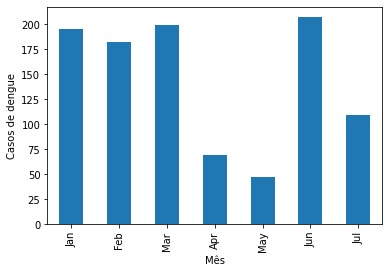

In [250]:
# Análise para Casos de dengue x Meses 

crossed_info['month'] = crossed_info['dt_notificacao'].dt.strftime('%b')
crossed_info.plot(x='month', y='CASOS_DENGUE', kind='bar', legend=False, ylabel='Casos de dengue', xlabel='Mês')


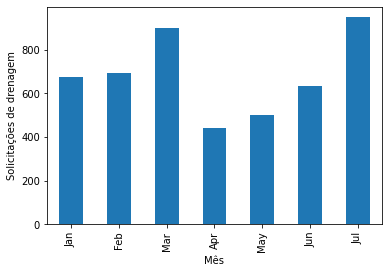

In [252]:
# Análise para solicitações de Drenagem x Meses 

crossed_info.plot(x='month', y='CHAMADOS_EMLURB', kind='bar', legend=False, ylabel='Solicitações de drenagem', xlabel='Mês')


In [253]:
# gráfico scatter casos dengue x drenagens

# **Análise de chamados de drenagem não atendidos pela EMLURB x Casos de Dengue**

In [ ]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data["no_bairro_residencia"].value_counts()

In [ ]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue_data["dt_notificacao"])

dengue_data = dengue_data.groupby(["no_bairro_residencia", "dt_notificacao"]).size().reset_index(name="CASOS_DENGUE")

dengue_data.head()

In [ ]:
emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA", "SITUACAO"]]

servicos = ["DRENAGEM"]
emlurb_data = emlurb_data[emlurb_data.GRUPOSERVICO_DESCRICAO.isin(servicos)]
emlurb_data = emlurb_data[(emlurb_data.SITUACAO != "ATENDIDA")]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])

emlurb_data.head()

In [185]:
emlurb_data = emlurb_data.groupby(["BAIRRO", "DATA_DEMANDA"]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data.head()


,BAIRRO,DATA_DEMANDA,CHAMADOS_EMLURB
0,AFLITOS,2020-01-15,1
1,AFLITOS,2020-03-03,1
2,AFLITOS,2020-03-04,1
3,AFLITOS,2020-04-17,1
4,AFLITOS,2020-05-07,1


In [ ]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["no_bairro_residencia","dt_notificacao"],right_on=["BAIRRO", "DATA_DEMANDA"])
crossed_info.head()

In [187]:
crossed_info.size

1374

In [188]:
# Analise da correlação

from scipy import stats
stats.ttest_rel(crossed_info['CASOS_DENGUE'], crossed_info['CHAMADOS_EMLURB'])

Ttest_relResult(statistic=-0.8150945908464697, pvalue=0.4158687761557307)

Há **forte** correlação entre casos diários de dengue com chamados de drenagem não atendidos pela EMLURB no ano de 2020.

Próximos passos:
  * Analizar novamente casos gerais, porém na escala de um mês em vez de diária

## Estudo de gráficos (cenário 2)

Primeiro, analisamos as tabelas com os dados originais. Coletando o número de casos de dengue e solicitações de drenagem por bairro. Em seguida, utilizamos a tabela com informações cruzadas.

IndexError: ignored

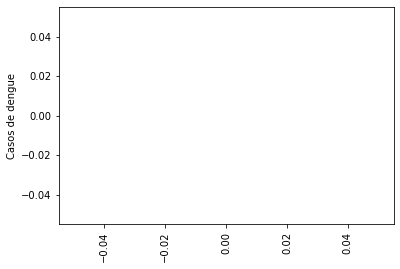

In [399]:
# Análise para Casos de dengue x Bairros (para mais de 10 casos de dengue)

dengue_filter = dengue_data.groupby("no_bairro_residencia").filter(lambda x: len(x) > 10)
dengue_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue', xlabel='Bairros')

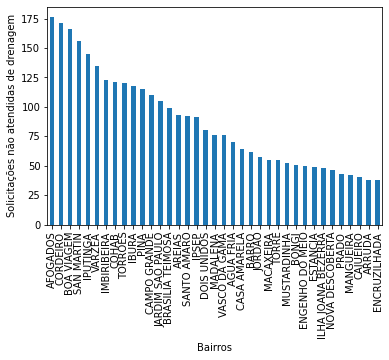

In [137]:
# Análise para Solicitações não atendidas de drenagem x Bairros (para mais de 35 chamados não atendidos)

emlurb_filter = emlurb_data.groupby("BAIRRO").filter(lambda x: len(x) > 35)
emlurb_filter['BAIRRO'].value_counts().plot(kind='bar', ylabel='Solicitações não atendidas de drenagem', xlabel='Bairros')

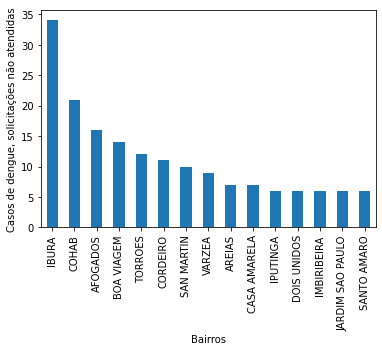

In [139]:
# Análise para Casos de dengue com solicitações não atendidas de drenagem x Bairros (mais de 5 casos)

crossed_info_filter = crossed_info.groupby("no_bairro_residencia").filter(lambda x: len(x) > 5)
crossed_info_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue, solicitações não atendidas', xlabel='Bairros')

# **Análise de chamados de drenagem  x Casos de Dengue (Mensal)**

In [ ]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data.head()

In [ ]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue["dt_notificacao"], infer_datetime_format=True)

dengue_data=dengue_data.groupby([pd.Grouper(key="dt_notificacao", freq="M"), "no_bairro_residencia"]).size().reset_index(name="CASOS_DENGUE")
dengue_data.describe()

In [ ]:
emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"], infer_datetime_format=True)

emlurb_data.describe()

In [398]:
emlurb_data = emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M"), "BAIRRO"]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data.head()

,DATA_DEMANDA,BAIRRO,CHAMADOS_EMLURB
0,2020-01-31,AFLITOS,1
1,2020-01-31,AFOGADOS,1
2,2020-01-31,AGUA FRIA,1
3,2020-01-31,ALTO DO MANDU,1
4,2020-01-31,ALTO JOSE BONIFACIO,1


In [ ]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["no_bairro_residencia","dt_notificacao"],right_on=["BAIRRO", "DATA_DEMANDA"])
crossed_info.head()

In [ ]:
# Analise da correlação

from scipy import stats
stats.ttest_rel(crossed_info['CASOS_DENGUE'], crossed_info['CHAMADOS_EMLURB'])

Há **fraca** correlação entre casos mensais de dengue com chamados de drenagem não atendidos pela EMLURB no ano de 2020.
